In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
traits_df = pd.read_csv('../data/physiology/madin_et_al/condensed_traits_GTDB.csv')
traits_df.head()

/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_7697/116373333.py:1: DtypeWarning: Columns (4,5,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  traits_df = pd.read_csv('../data/physiology/madin_et_al/condensed_traits_GTDB.csv')


,tax_id,species_tax_id,data_source,org_name,gram_stain,metabolism,pathways,carbon_substrates,sporulation,motility,...,rRNA16S_genes,tRNA_genes,ref_id,superkingdom,phylum,class,order,family,genus,species
0,54261,54261,amend-shock,Ferroglobus placidus,NaN,NaN,nitrate_reduction,NaN,NaN,NaN,...,NaN,NaN,1.0,Archaea,Halobacterota,Archaeoglobi,Archaeoglobales,Archaeoglobaceae,Ferroglobus,Ferroglobus placidus
1,29466,29466,amend-shock,Veillonella alcalescens,NaN,NaN,nitrate_reduction,NaN,NaN,NaN,...,NaN,NaN,NaN,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Veillonellaceae,Veillonella,Veillonella parvula
2,266,266,amend-shock,Micrococcus denitrificans,NaN,NaN,nitrate_reduction,NaN,NaN,NaN,...,NaN,NaN,NaN,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Paracoccus,Paracoccus denitrificans_A
3,36861,36861,amend-shock,Thiobacillus denitrificans,NaN,NaN,nitrate_reduction,NaN,NaN,NaN,...,NaN,NaN,3.0,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Hydrogenophilaceae,Thiobacillus,Thiobacillus denitrificans_E
4,1484,1484,amend-shock,Bacillus schlegelii,NaN,NaN,nitrate_reduction,NaN,NaN,NaN,...,NaN,NaN,4.0,Bacteria,Firmicutes_I,Bacilli_A,Thermicanales,Thermicanaceae,Hydrogenibacillus,Hydrogenibacillus schlegelii


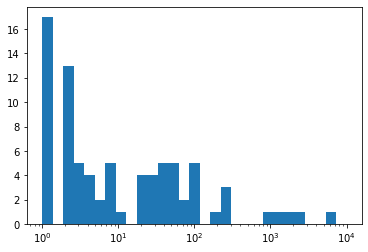

In [75]:
# Take the maximum for each species
max_gr = traits_df.groupby('species_tax_id').agg({
    'doubling_h': 'max',
    'org_name': 'first',
    'phylum': 'first',
    'class': 'first',
    'order': 'first',
    'family': 'first'})
max_gr['lambda_h'] = np.log(2) / max_gr.doubling_h

# Plot the distribution of counts per phylum
phy_counts = max_gr.phylum.value_counts()
plt.figure()
plt.xscale('log')
plt.hist(phy_counts, bins=np.logspace(0, 4, 30))

# Keep only phyla with more than 10 species
phyla2keep = phy_counts[phy_counts > 40].index.values

mask = np.logical_and(max_gr.phylum.isin(phyla2keep), max_gr.doubling_h.notnull())
max_gr_2use = max_gr[mask].copy()

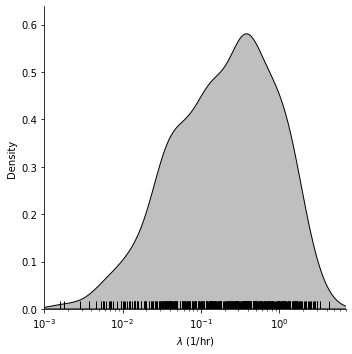

In [110]:
sns.displot(max_gr_2use.lambda_h, log_scale=True, kind='kde', rug=True, color='k', fill=True)
plt.xlabel('$\lambda$ (1/hr)')
plt.xlim(1e-3, 7)
plt.show()

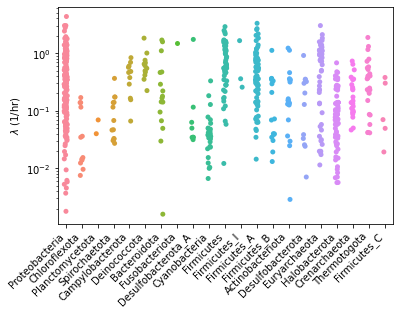

In [84]:
plt.show()
plt.yscale('log')
order = 'Proteobacteria,Firmicutes,Chloroflexota,Cyanobacteria'.split(',')
sns.stripplot(data=max_gr_2use, y='lambda_h', x='phylum', jitter=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('$\lambda$ (1/hr)')
plt.show()

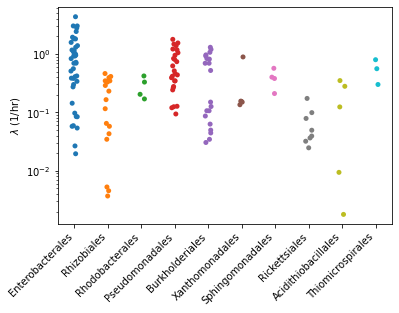

In [86]:
mask2 = max_gr_2use.phylum == 'Proteobacteria'
masked = max_gr_2use[mask2]
order_counts = masked.order.value_counts()
orders2use = order_counts > 2
masked = masked[masked.order.isin(orders2use[orders2use].index)]

plt.show()
plt.yscale('log')
sns.stripplot(data=masked, y='lambda_h', x='order', jitter=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('$\lambda$ (1/hr)')
plt.show()

In [113]:
mask = max_gr_2use.lambda_h > 1.5
max_gr_2use[mask]

,doubling_h,org_name,phylum,class,order,family,lambda_h
species_tax_id,,,,,,,
353,0.450000,azotobacter_chroococcum,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,1.540327
548,0.286667,Aerobacter aerogenes,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,2.417955
585,0.358333,proteus_vulgaris,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,1.934364
622,0.383333,shigella_dysenteriae,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,1.808210
644,0.380000,Aeromonas hydrophila,Proteobacteria,Gammaproteobacteria,Enterobacterales,Aeromonadaceae,1.824072
663,0.250000,Vibrio alginolyticus,Proteobacteria,Gammaproteobacteria,Enterobacterales,Vibrionaceae,2.772589
666,0.440000,Vibrio cholerae,Proteobacteria,Gammaproteobacteria,Enterobacterales,Vibrionaceae,1.575335
670,0.230000,beneckea_parahaemolytica,Proteobacteria,Gammaproteobacteria,Enterobacterales,Vibrionaceae,3.013683
691,0.160000,Vibrio natriegens,Proteobacteria,Gammaproteobacteria,Enterobacterales,Vibrionaceae,4.332170
